In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt 
import spacy
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from toolbox.complexity import complexity
from toolbox.quality import quality
from toolbox.generic import generic
from toolbox.readability import readability
from toolbox import model_utils as m_u
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_excel("training_set_rel3.xlsx")

In [3]:
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,"Dear local newspaper, my name is @PERSON1, & I...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,297,1,"Dear local Newspaper, I assume you've heard ab...",4,5,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,298,1,"Dear Newspaper, I think computer use is good b...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,299,1,Do you think computers have a negative effect ...,4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfx = df.copy(deep =True)
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,"Dear local newspaper, my name is @PERSON1, & I...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,297,1,"Dear local Newspaper, I assume you've heard ab...",4,5,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,298,1,"Dear Newspaper, I think computer use is good b...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,299,1,Do you think computers have a negative effect ...,4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfx.isna().sum()

essay_id            0
essay_set           0
essay               0
rater1_domain1      0
rater2_domain1      0
rater3_domain1    300
domain1_score       0
rater1_domain2    300
rater2_domain2    300
domain2_score     300
rater1_trait1     300
rater1_trait2     300
rater1_trait3     300
rater1_trait4     300
rater1_trait5     300
rater1_trait6     300
rater2_trait1     300
rater2_trait2     300
rater2_trait3     300
rater2_trait4     300
rater2_trait5     300
rater2_trait6     300
rater3_trait1     300
rater3_trait2     300
rater3_trait3     300
rater3_trait4     300
rater3_trait5     300
rater3_trait6     300
dtype: int64

In [6]:
dfx.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,300.000000,300.0,300.000000,300.000000,0.0,300.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,150.500000,1.0,4.283333,4.266667,NaN,8.550000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,86.746758,0.0,0.878804,0.889678,NaN,1.660328,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.0,1.000000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,75.750000,1.0,4.000000,4.000000,NaN,8.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,150.500000,1.0,4.000000,4.000000,NaN,8.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,225.250000,1.0,5.000000,5.000000,NaN,10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,300.000000,1.0,6.000000,6.000000,NaN,12.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,"Dear local newspaper, my name is @PERSON1, & I...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,297,1,"Dear local Newspaper, I assume you've heard ab...",4,5,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,298,1,"Dear Newspaper, I think computer use is good b...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,299,1,Do you think computers have a negative effect ...,4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


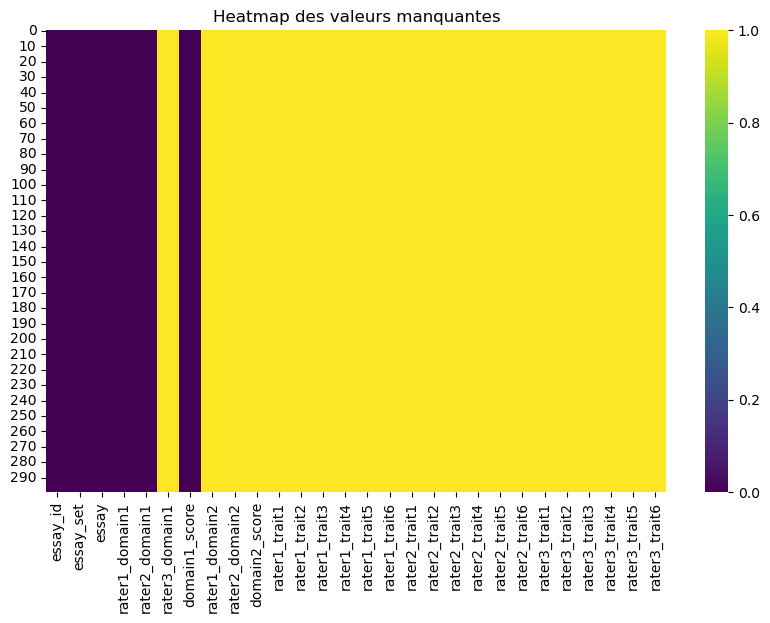

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(dfx.isnull(), cmap='viridis', cbar=True)
plt.title('Heatmap des valeurs manquantes')
plt.show()

## les valeurs manquantes sont en jaune
## Nous allons donc remplir les valeurs manquantes dans différentes colonnes de votre DataFrame en utilisant la stratégie de l'imputation la plus fréquente 


In [9]:
from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy='most_frequent')
#imputer.fit_transform(dfx['rater1_domain2'])
imputer = SimpleImputer(strategy='most_frequent')
dfx['rater1_domain2'] = imputer.fit_transform(dfx[['rater1_domain2']])
dfx['rater1_domain1'] = imputer.fit_transform(dfx[['rater1_domain1']])
dfx['rater2_domain1'] = imputer.fit_transform(dfx[['rater2_domain1']])
dfx['rater3_domain1'] = imputer.fit_transform(dfx[['rater3_domain1']])
dfx['rater2_domain2'] = imputer.fit_transform(dfx[['rater2_domain2']])
dfx['domain2_score'] = imputer.fit_transform(dfx[['domain2_score']])
dfx['domain1_score'] = imputer.fit_transform(dfx[['domain1_score']])
dfx['rater1_trait1'] = imputer.fit_transform(dfx[['rater1_trait1']])
dfx['rater1_trait2'] = imputer.fit_transform(dfx[['rater1_trait2']])
dfx['rater1_trait3'] = imputer.fit_transform(dfx[['rater1_trait3']])
dfx['rater1_trait4'] = imputer.fit_transform(dfx[['rater1_trait4']])
dfx['rater1_trait5'] = imputer.fit_transform(dfx[['rater1_trait5']])
dfx['rater1_trait6'] = imputer.fit_transform(dfx[['rater1_trait6']])
dfx['rater2_trait1'] = imputer.fit_transform(dfx[['rater2_trait1']])
dfx['rater2_trait2'] = imputer.fit_transform(dfx[['rater2_trait2']])
dfx['rater2_trait3'] = imputer.fit_transform(dfx[['rater2_trait3']])
dfx['rater2_trait4'] = imputer.fit_transform(dfx[['rater2_trait4']])
dfx['rater2_trait5'] = imputer.fit_transform(dfx[['rater2_trait5']])
dfx['rater2_trait6'] = imputer.fit_transform(dfx[['rater2_trait6']])
dfx['rater3_trait1'] = imputer.fit_transform(dfx[['rater3_trait1']])
dfx['rater3_trait2'] = imputer.fit_transform(dfx[['rater3_trait2']])
dfx['rater3_trait3'] = imputer.fit_transform(dfx[['rater3_trait3']])
dfx['rater3_trait4'] = imputer.fit_transform(dfx[['rater3_trait4']])
dfx['rater3_trait5'] = imputer.fit_transform(dfx[['rater3_trait5']])
dfx['rater3_trait6'] = imputer.fit_transform(dfx[['rater3_trait6']])
dfx


C:\Users\HP\.conda\envs\my_test_env\lib\site-packages\sklearn\impute\_base.py:565: UserWarning: Skipping features without any observed values: ['rater1_domain2']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
C:\Users\HP\.conda\envs\my_test_env\lib\site-packages\sklearn\impute\_base.py:565: UserWarning: Skipping features without any observed values: ['rater3_domain1']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
C:\Users\HP\.conda\envs\my_test_env\lib\site-packages\sklearn\impute\_base.py:565: UserWarning: Skipping features without any observed values: ['rater2_domain2']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
C:\Users\HP\.conda\envs\my_test_env\lib\site-packages\sklearn\impute\_base.py:565: UserWarning: Skipping features without any observed values: ['domain2_score']. At least one non-missing value is nee

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,7.447358e-318,8,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,7.447358e-318,9,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7.447358e-318,7,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,7.447358e-318,10,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,7.447358e-318,8,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,"Dear local newspaper, my name is @PERSON1, & I...",5,5,7.447358e-318,10,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,297,1,"Dear local Newspaper, I assume you've heard ab...",4,5,7.447358e-318,9,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,298,1,"Dear Newspaper, I think computer use is good b...",4,4,7.447358e-318,8,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,299,1,Do you think computers have a negative effect ...,4,4,7.447358e-318,8,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
dfx.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [11]:
dfx

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,7.447358e-318,8,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,7.447358e-318,9,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7.447358e-318,7,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,7.447358e-318,10,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,7.447358e-318,8,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,"Dear local newspaper, my name is @PERSON1, & I...",5,5,7.447358e-318,10,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,297,1,"Dear local Newspaper, I assume you've heard ab...",4,5,7.447358e-318,9,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,298,1,"Dear Newspaper, I think computer use is good b...",4,4,7.447358e-318,8,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,299,1,Do you think computers have a negative effect ...,4,4,7.447358e-318,8,7.748604e-304,8.321552e-317,3.952525e-323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
comp, qual, gen,  reada = complexity(), quality(), generic(), readability()

In [13]:



dfx['token_nbr'] = dfx['essay'].apply(gen.get_token_nbr)
dfx['mean_len'] = dfx['essay'].apply(gen.get_mean_len)

dfx['sophisticated_nbr'] = dfx['essay'].apply(qual.get_sophisticated_nbr)
dfx['level_of_language'] = dfx['essay'].apply(qual.level_of_language)

dfx['gunning_fog'] = dfx['essay'].apply(reada.g_fog)
dfx['ari'] = dfx['essay'].apply(reada.ari)
dfx['smog_index'] = dfx['essay'].apply(reada.smog_index)
dfx['flesch_kincaid'] = dfx['essay'].apply(reada.flesch_kincaid)
dfx['dale_chall_readability'] = dfx['essay'].apply(reada.dale_chall_readability)


dfx['coleman_liau'] = dfx['essay'].apply(comp.coleman_liau)
dfx['root_ttr'] = dfx['essay'].apply(comp.root_ttr)
dfx['ttr'] = dfx['essay'].apply(comp.ttr)
dfx['log_ttr'] = dfx['essay'].apply(comp.log_ttr)
dfx['mass_ttr'] = dfx['essay'].apply(comp.mass_ttr)
dfx['msttr'] = dfx['essay'].apply(comp.msttr)
dfx['mtld'] = dfx['essay'].apply(comp.mtld)
defx

In [14]:
dfx[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog',
       'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau',
       'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr',
       'msttr', 'mtld']].corr()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,smog_index,flesch_kincaid,coleman_liau,dale_chall_readability,root_ttr,ttr,log_ttr,mass_ttr,msttr,mtld
essay_id,1.000000,NaN,0.114395,0.141967,NaN,0.136621,NaN,NaN,NaN,NaN,...,-0.011457,-0.031495,-0.004344,-0.059233,0.119623,-0.039996,0.000239,-0.054351,0.071821,0.085011
essay_set,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rater1_domain1,0.114395,NaN,1.000000,0.762845,NaN,0.938062,NaN,NaN,NaN,NaN,...,0.212897,-0.058930,0.215404,-0.043307,0.634979,-0.455451,-0.195251,-0.143667,0.299794,0.310358
rater2_domain1,0.141967,NaN,0.762845,1.000000,NaN,0.939615,NaN,NaN,NaN,NaN,...,0.191799,-0.154778,0.163868,-0.077356,0.680146,-0.413967,-0.143119,-0.203886,0.349046,0.337652
rater3_domain1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domain1_score,0.136621,NaN,0.938062,0.939615,NaN,1.000000,NaN,NaN,NaN,NaN,...,0.215460,-0.114129,0.201820,-0.064373,0.700544,-0.462890,-0.180035,-0.185294,0.345714,0.345200
rater1_domain2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rater2_domain2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
domain2_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rater1_trait1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dfx['domain1_score'] = df['domain1_score']
dfa = df.copy(deep=True)
dfa

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,"Dear local newspaper, my name is @PERSON1, & I...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,297,1,"Dear local Newspaper, I assume you've heard ab...",4,5,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,298,1,"Dear Newspaper, I think computer use is good b...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,299,1,Do you think computers have a negative effect ...,4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:


#imputer = SimpleImputer(strategy='most_frequent')
#imputer.fit_transform(dfx['rater1_domain2'])
imputer = SimpleImputer(strategy='most_frequent')
dfa['rater3_domain1'] = imputer.fit_transform(dfa[['rater3_domain1']])

dfa1 = dfa[dfa.essay_set == 1]
dfa2 = dfa[dfa.essay_set == 2]
dfa3 = dfa[dfa.essay_set == 3]
dfa4 = dfa[dfa.essay_set == 4]
dfa5 = dfa[dfa.essay_set == 5]
dfa6 = dfa[dfa.essay_set == 6]
dfa7 = dfa[dfa.essay_set == 7]
dfa8 = dfa[dfa.essay_set == 8]


In [24]:
dfa.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [25]:
dfa.isna().sum()

essay_id            0
essay_set           0
essay               0
rater1_domain1      0
rater2_domain1      0
rater3_domain1      0
domain1_score       0
rater1_domain2    300
rater2_domain2    300
domain2_score     300
rater1_trait1     300
rater1_trait2     300
rater1_trait3     300
rater1_trait4     300
rater1_trait5     300
rater1_trait6     300
rater2_trait1     300
rater2_trait2     300
rater2_trait3     300
rater2_trait4     300
rater2_trait5     300
rater2_trait6     300
rater3_trait1     300
rater3_trait2     300
rater3_trait3     300
rater3_trait4     300
rater3_trait5     300
rater3_trait6     300
dtype: int64

In [26]:
dfa.to_excel("test.xlsx") 


In [27]:
dfl = dfa.copy(deep=True)
#dfa1 = dfa[dfa.essay_set == 1]
#dfa2 = dfa[dfa.essay_set == 2]
#dfa3 = dfa[dfa.essay_set == 3]
#dfa4 = dfa[dfa.essay_set == 4]
#dfa5 = dfa[dfa.essay_set == 5]
#dfa6 = dfa[dfa.essay_set == 6]
#dfa7 = dfa[dfa.essay_set == 7]
#dfa8 = dfa[dfa.essay_set == 8]

In [28]:
dfa1['domain1_score'] = (dfa1['domain1_score'] - dfa1['domain1_score'].min()) / (dfa1['domain1_score'].max() - dfa1['domain1_score'].min()) * (10 - 1) + 1
dfa1['domain1_score'] = dfa1['domain1_score'].round().astype(int)

dfa1['rater1_domain1'] = (dfa1['rater1_domain1'] - dfa1['rater1_domain1'].min()) / (dfa1['rater1_domain1'].max() - dfa1['rater1_domain1'].min()) * (10 - 1) + 1
dfa1['rater1_domain1'] = dfa1['rater1_domain1'].round().astype(int)

dfa1['rater2_domain1'] = (dfa1['rater2_domain1'] - dfa1['rater2_domain1'].min()) / (dfa1['rater2_domain1'].max() - dfa1['rater2_domain1'].min()) * (10 - 1) + 1
dfa1['rater2_domain1'] = dfa1['rater2_domain1'].round().astype(int)

#dfa1['rater3_domain1'] = (dfa1['rater3_domain1'] - dfa1['rater3_domain1'].min()) / (dfa1['rater3_domain1'].max() - dfa1['rater3_domain1'].min()) * (10 - 1) + 1
#dfa1['rater3_domain1'] = dfa1['rater3_domain1'].round().astype(int)

dfa2['domain1_score'] = (dfa2['domain1_score'] - dfa2['domain1_score'].min()) / (dfa2['domain1_score'].max() - dfa2['domain1_score'].min()) * (10 - 1) + 1
dfa2['domain1_score'] = dfa2['domain1_score'].round().astype(int)

dfa2['rater1_domain1'] = (dfa2['rater1_domain1'] - dfa2['rater1_domain1'].min()) / (dfa2['rater1_domain1'].max() - dfa2['rater1_domain1'].min()) * (10 - 1) + 1
dfa2['rater1_domain1'] = dfa2['rater1_domain1'].round().astype(int)

dfa2['rater2_domain1'] = (dfa2['rater2_domain1'] - dfa2['rater2_domain1'].min()) / (dfa2['rater2_domain1'].max() - dfa2['rater2_domain1'].min()) * (10 - 1) + 1
dfa2['rater2_domain1'] = dfa2['rater2_domain1'].round().astype(int)

#dfa2['rater3_domain1'] = (dfa2['rater3_domain1'] - dfa2['rater3_domain1'].min()) / (dfa2['rater3_domain1'].max() - dfa2['rater3_domain1'].min()) * (10 - 1) + 1
#dfa2['rater3_domain1'] = dfa2['rater3_domain1'].round().astype(int)

dfa3['domain1_score'] = (dfa3['domain1_score'] - dfa3['domain1_score'].min()) / (dfa3['domain1_score'].max() - dfa3['domain1_score'].min()) * (10 - 1) + 1
dfa3['domain1_score'] = dfa3['domain1_score'].round().astype(int)

dfa3['rater1_domain1'] = (dfa3['rater1_domain1'] - dfa3['rater1_domain1'].min()) / (dfa3['rater1_domain1'].max() - dfa3['rater1_domain1'].min()) * (10 - 1) + 1
dfa3['rater1_domain1'] = dfa3['rater1_domain1'].round().astype(int)

dfa3['rater2_domain1'] = (dfa3['rater2_domain1'] - dfa3['rater2_domain1'].min()) / (dfa3['rater2_domain1'].max() - dfa3['rater2_domain1'].min()) * (10 - 1) + 1
dfa3['rater2_domain1'] = dfa3['rater2_domain1'].round().astype(int)

#dfa3['rater3_domain1'] = (dfa3['rater3_domain1'] - dfa3['rater3_domain1'].min()) / (dfa3['rater3_domain1'].max() - dfa3['rater3_domain1'].min()) * (10 - 1) + 1
#dfa3['rater3_domain1'] = dfa3['rater3_domain1'].round().astype(int)

dfa4['domain1_score'] = (dfa4['domain1_score'] - dfa4['domain1_score'].min()) / (dfa4['domain1_score'].max() - dfa4['domain1_score'].min()) * (10 - 1) + 1
dfa4['domain1_score'] = dfa4['domain1_score'].round().astype(int)

dfa4['rater1_domain1'] = (dfa4['rater1_domain1'] - dfa4['rater1_domain1'].min()) / (dfa4['rater1_domain1'].max() - dfa4['rater1_domain1'].min()) * (10 - 1) + 1
dfa4['rater1_domain1'] = dfa4['rater1_domain1'].round().astype(int)

dfa4['rater2_domain1'] = (dfa4['rater2_domain1'] - dfa4['rater2_domain1'].min()) / (dfa4['rater2_domain1'].max() - dfa4['rater2_domain1'].min()) * (10 - 1) + 1
dfa4['rater2_domain1'] = dfa4['rater2_domain1'].round().astype(int)

#dfa4['rater3_domain1'] = (dfa4['rater3_domain1'] - dfa4['rater3_domain1'].min()) / (dfa4['rater3_domain1'].max() - dfa4['rater3_domain1'].min()) * (10 - 1) + 1
#dfa4['rater3_domain1'] = dfa4['rater3_domain1'].round().astype(int)

dfa5['domain1_score'] = (dfa5['domain1_score'] - dfa5['domain1_score'].min()) / (dfa5['domain1_score'].max() - dfa5['domain1_score'].min()) * (10 - 1) + 1
dfa5['domain1_score'] = dfa5['domain1_score'].round().astype(int)

dfa5['rater1_domain1'] = (dfa5['rater1_domain1'] - dfa5['rater1_domain1'].min()) / (dfa5['rater1_domain1'].max() - dfa5['rater1_domain1'].min()) * (10 - 1) + 1
dfa5['rater1_domain1'] = dfa5['rater1_domain1'].round().astype(int)

dfa5['rater2_domain1'] = (dfa5['rater2_domain1'] - dfa5['rater2_domain1'].min()) / (dfa5['rater2_domain1'].max() - dfa5['rater2_domain1'].min()) * (10 - 1) + 1
dfa5['rater2_domain1'] = dfa5['rater2_domain1'].round().astype(int)

#dfa5['rater3_domain1'] = (dfa5['rater3_domain1'] - dfa5['rater3_domain1'].min()) / (dfa5['rater3_domain1'].max() - dfa5['rater3_domain1'].min()) * (10 - 1) + 1
#dfa5['rater3_domain1'] = dfa5['rater3_domain1'].round().astype(int)

dfa6['domain1_score'] = (dfa6['domain1_score'] - dfa6['domain1_score'].min()) / (dfa6['domain1_score'].max() - dfa6['domain1_score'].min()) * (10 - 1) + 1
dfa6['domain1_score'] = dfa6['domain1_score'].round().astype(int)

dfa6['rater1_domain1'] = (dfa6['rater1_domain1'] - dfa6['rater1_domain1'].min()) / (dfa6['rater1_domain1'].max() - dfa6['rater1_domain1'].min()) * (10 - 1) + 1
dfa6['rater1_domain1'] = dfa6['rater1_domain1'].round().astype(int)

dfa6['rater2_domain1'] = (dfa6['rater2_domain1'] - dfa6['rater2_domain1'].min()) / (dfa6['rater2_domain1'].max() - dfa6['rater2_domain1'].min()) * (10 - 1) + 1
dfa6['rater2_domain1'] = dfa6['rater2_domain1'].round().astype(int)

#dfa6['rater3_domain1'] = (dfa6['rater3_domain1'] - dfa6['rater3_domain1'].min()) / (dfa6['rater3_domain1'].max() - dfa6['rater3_domain1'].min()) * (10 - 1) + 1
#dfa6['rater3_domain1'] = dfa6['rater3_domain1'].round().astype(int)

dfa7['domain1_score'] = (dfa7['domain1_score'] - dfa7['domain1_score'].min()) / (dfa7['domain1_score'].max() - dfa7['domain1_score'].min()) * (10 - 1) + 1
dfa7['domain1_score'] = dfa7['domain1_score'].round().astype(int)

dfa7['rater1_domain1'] = (dfa7['rater1_domain1'] - dfa7['rater1_domain1'].min()) / (dfa7['rater1_domain1'].max() - dfa7['rater1_domain1'].min()) * (10 - 1) + 1
dfa7['rater1_domain1'] = dfa7['rater1_domain1'].round().astype(int)

dfa7['rater2_domain1'] = (dfa7['rater2_domain1'] - dfa7['rater2_domain1'].min()) / (dfa7['rater2_domain1'].max() - dfa7['rater2_domain1'].min()) * (10 - 1) + 1
dfa7['rater2_domain1'] = dfa7['rater2_domain1'].round().astype(int)

#dfa7['rater3_domain1'] = (dfa7['rater3_domain1'] - dfa7['rater3_domain1'].min()) / (dfa7['rater3_domain1'].max() - dfa7['rater3_domain1'].min()) * (10 - 1) + 1
#dfa7['rater3_domain1'] = dfa7['rater3_domain1'].round().astype(int)

dfa8['domain1_score'] = (dfa8['domain1_score'] - dfa8['domain1_score'].min()) / (dfa8['domain1_score'].max() - dfa8['domain1_score'].min()) * (10 - 1) + 1
dfa8['domain1_score'] = dfa8['domain1_score'].round().astype(int)

dfa8['rater1_domain1'] = (dfa8['rater1_domain1'] - dfa8['rater1_domain1'].min()) / (dfa8['rater1_domain1'].max() - dfa8['rater1_domain1'].min()) * (10 - 1) + 1
dfa8['rater1_domain1'] = dfa8['rater1_domain1'].round().astype(int)

dfa8['rater2_domain1'] = (dfa8['rater2_domain1'] - dfa8['rater2_domain1'].min()) / (dfa8['rater2_domain1'].max() - dfa8['rater2_domain1'].min()) * (10 - 1) + 1
dfa8['rater2_domain1'] = dfa8['rater2_domain1'].round().astype(int)

#dfa8['rater3_domain1'] = (dfa8['rater3_domain1'] - dfa8['rater3_domain1'].min()) / (dfa8['rater3_domain1'].max() - dfa8['rater3_domain1'].min()) * (10 - 1) + 1
#dfa8['rater3_domain1'] = dfa8['rater3_domain1'].round().astype(int)

#dfa8['rater1_domain1'] = (dfa8['rater1_domain1'] - dfa8['rater1_domain1'].min()) / (dfa8['rater1_domain1'].max() - dfa8['rater1_domain1'].min()) * (5 - 1) + 1
#dfa8['rater1_domain1'] = dfa8['rater1_domain1'].round().astype(int)
#dfa8

#dfa8['rater2_domain1'] = (dfa8['rater2_domain1'] - dfa8['rater2_domain1'].min()) / (dfa8['rater2_domain1'].max() - dfa8['rater2_domain1'].min()) * (5 - 1) + 1
#dfa8['rater2_domain1'] = dfa8['rater2_domain1'].round().astype(int)
#dfa8

In [41]:
dfr = pd.concat([dfa1, dfa2, dfa3, dfa4, dfa5, dfa6, dfa7, dfa8], ignore_index=True)
dfr

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",6,6,1.112575e-306,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",8,6,1.112575e-306,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",6,5,1.112575e-306,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",8,8,1.112575e-306,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",6,6,1.112575e-306,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,"Dear local newspaper, my name is @PERSON1, & I...",8,8,1.112575e-306,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,297,1,"Dear local Newspaper, I assume you've heard ab...",6,8,1.112575e-306,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,298,1,"Dear Newspaper, I think computer use is good b...",6,6,1.112575e-306,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,299,1,Do you think computers have a negative effect ...,6,6,1.112575e-306,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
dfr.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [42]:
#test = dfr.drop(['essay', ''], axis=1).copy()
print(dfa1.shape[0],
dfa2.shape[0],
dfa3.shape[0],
dfa4.shape[0],
dfa5.shape[0],
dfa6.shape[0],
dfa7.shape[0],
dfa8.shape[0])

300 0 0 0 0 0 0 0


In [43]:
Res = dfr.copy(deep=True)
y = Res['domain1_score']
X = Res.drop(['essay', 'domain1_score'], axis=1).copy()

X

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,6,6,1.112575e-306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,8,6,1.112575e-306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,6,5,1.112575e-306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,8,8,1.112575e-306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,6,6,1.112575e-306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,1,8,8,1.112575e-306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,297,1,6,8,1.112575e-306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,298,1,6,6,1.112575e-306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,299,1,6,6,1.112575e-306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=T['domain1_score'], random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
print(regr.score(X_test, y_test))

In [40]:

y_pred = regr.predict(X_test)
#plt.scatter(X_test['essay_id'], y_test, color ='b')
#plt.plot(X_test['essay_id'], y_pred, color ='k')

#plt.show()
import numpy as np
import matplotlib.pyplot as plt

data = dfr['domain1_score']

value_range = range(1, 10)

value_counts = np.histogram(data, bins=list(value_range) + [max(value_range) + 1])[0]

plt.bar(value_range, value_counts, color='blue', alpha=0.7)

plt.xlabel('Value Range')
plt.ylabel('Occurrences')
plt.title('Occurrences of Values in a Range')

plt.show()


NameError: name 'regr' is not defined

In [32]:
"""dfr[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog', 
       'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau',
       'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr',
       'msttr', 'mtld']].corr()

KeyError: "['token_nbr', 'mean_len', 'sophisticated_nbr', 'gunning_fog', 'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau', 'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr', 'msttr', 'mtld'] not in index"

In [44]:

(dfr[['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6', 'token_nbr',
       'mean_len', 'sophisticated_nbr', 'gunning_fog',
       'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau',
       'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr',
       'msttr', 'mtld']].corr()).to_excel('output.xlsx', index=False)

KeyError: "['token_nbr', 'mean_len', 'sophisticated_nbr', 'gunning_fog', 'ari', 'smog_index', 'flesch_kincaid', 'coleman_liau', 'dale_chall_readability', 'root_ttr', 'ttr', 'log_ttr', 'mass_ttr', 'msttr', 'mtld'] not in index"

In [ ]:
round(2.6)

In [ ]:
dfr.columns

In [34]:
T = dfr.copy(deep=True)
T = T.drop(['essay_id', 'essay_set', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'], axis=1)

NameError: name 'xg_reg' is not defined

In [36]:
T.columns

Index(['essay', 'domain1_score'], dtype='object')

In [37]:
y = T['domain1_score']
X = T.drop(['essay', 'domain1_score'], axis=1).copy()
X

""
0
1
2
3
4
...
295
296
297
298


In [39]:


# Assuming you have a pandas DataFrame 'df' with features and target variable
# Replace 'your_target_column' with the actual name of your target column

# Load your data (replace 'your_data.csv' with your actual data file)
# df = pd.read_csv('your_data.csv')

# Separate features and target variable
y = T['domain1_score']
X = T.drop(['essay', 'domain1_score'], axis=1).copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate an XGBoost regressor for regression
xg_reg = xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:squarederror')

# Fit the model to the training data
xg_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# You can also access feature importance
feature_importances = xg_reg.feature_importances_
print('Feature Importances:')
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')

threshold = 1.5  # Adjust as needed

# Calculate the percentage of predictions within the threshold
good_predictions = sum(abs(y_test - y_pred) <= threshold)
total_predictions = len(y_test)
percentage_good_predictions = (good_predictions / total_predictions) * 100

print(f'Percentage of predictions within the threshold ({threshold}): {percentage_good_predictions:.2f}%')

XGBoostError: [16:09:35] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\data\iterative_dmatrix.cc:202: Check failed: n_features >= 1 (0 vs. 1) : Data must has at least 1 column.

In [ ]:

essay_example = "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening."
print(m_u.get_prediction(essay_example, xg_reg, gen, reada, qual, comp))


In [ ]:
len(X.columns)

In [ ]:
print(len(T[T['domain1_score'] == 1]),
len(T[T['domain1_score'] == 2]),
len(T[T['domain1_score'] == 3]),
len(T[T['domain1_score'] == 4]),
len(T[T['domain1_score'] == 5]),
len(T[T['domain1_score'] == 6]),
len(T[T['domain1_score'] == 7]),
len(T[T['domain1_score'] == 8]),
len(T[T['domain1_score'] == 9]),
len(T[T['domain1_score'] == 10]))


In [ ]:
get = "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening."

print(generate_ngrams(get))

In [ ]:
#T['co_reference_features'] = T['essay'].apply(co_reference_features)
T['negative_score'] = T['essay'].apply(m_u.negative_score)
T['positive_score'] = T['essay'].apply(m_u.positive_score)
#T['syllable_count'] = T['essay'].apply(syllable_count)
T['read_time_difficulty_estimate'] = T['essay'].apply(m_u.read_time_difficulty_estimate)
T['word_entropy'] = T['essay'].apply(m_u.word_entropy)
T['noun_verb_ratio'] = T['essay'].apply(m_u.noun_verb_ratio)
T['unique_dependency_types'] = T['essay'].apply(m_u.unique_dependency_types)
T['avg_dependencies_per_token'] = T['essay'].apply(m_u.avg_dependencies_per_token)
T['dependency_parse_features'] = T['essay'].apply(m_u.dependency_parse_features)
T['read_time_estimate'] = T['essay'].apply(m_u.read_time_estimate)
#T['noun_verb_ratio'] = T['essay'].apply(noun_verb_ratio)
T['generate_ngrams'] = T['essay'].apply(m_u.generate_ngrams)
T['unique_word_count'] = T['essay'].apply(m_u.unique_word_count)
#T['named_entity_recognition'] = T['essay'].apply(named_entity_recognition)
T['stopword_count'] = T['essay'].apply(m_u.stopword_count)
T

In [ ]:
T.to_excel("save1.xlsx")

In [ ]:
C = T.drop(['essay'], axis=1).copy()
C.corr()


In [ ]:
C.columns

In [ ]:
C

In [ ]:
def change(x):
    if x == 'Easy':
        return 0
    elif x == 0:
        return 1
    return 2

T['read_time_difficulty_estimate'] = T['read_time_difficulty_estimate'].apply(change)
T